In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [17]:
data= pd.read_csv("/content/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
# Preprocess categorical variable (Gender) using Label Encoding
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [20]:
# Define x
x = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [21]:
# Select relevant features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [22]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Determine the range of clusters (k) to consider
range_n_clusters = range(2, 11)

In [24]:
# Perform KMeans clustering for each value of k and compute Silhouette score
silhouette_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is {silhouette_avg}")

For n_clusters = 2, the average silhouette_score is 0.29512063001659344
For n_clusters = 3, the average silhouette_score is 0.46658474419000145
For n_clusters = 4, the average silhouette_score is 0.4939069237513199
For n_clusters = 5, the average silhouette_score is 0.5546571631111091
For n_clusters = 6, the average silhouette_score is 0.5398800926790663
For n_clusters = 7, the average silhouette_score is 0.5263454490712252
For n_clusters = 8, the average silhouette_score is 0.45620041477955225
For n_clusters = 9, the average silhouette_score is 0.45532159949822093
For n_clusters = 10, the average silhouette_score is 0.44942277625588267


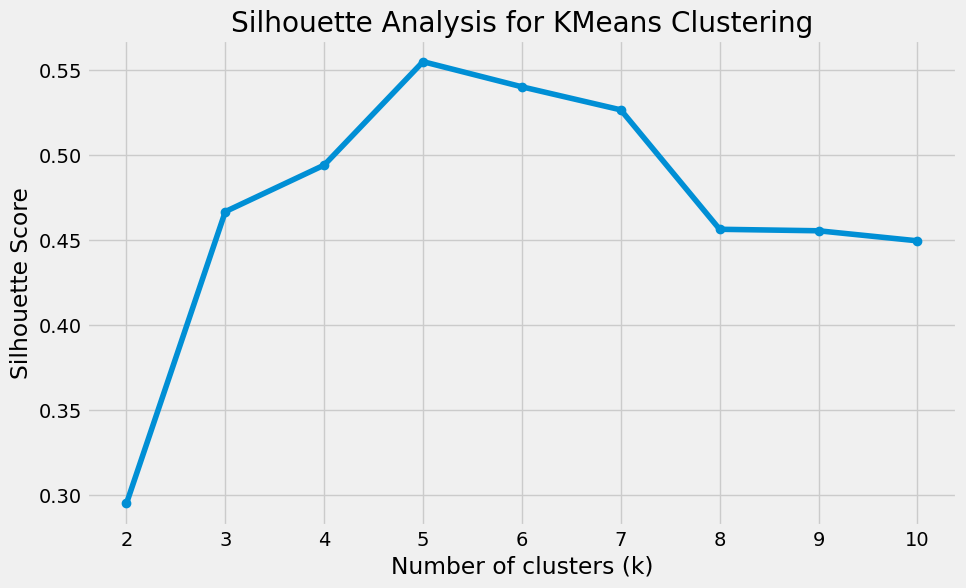

In [25]:
# Plot the Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for KMeans Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

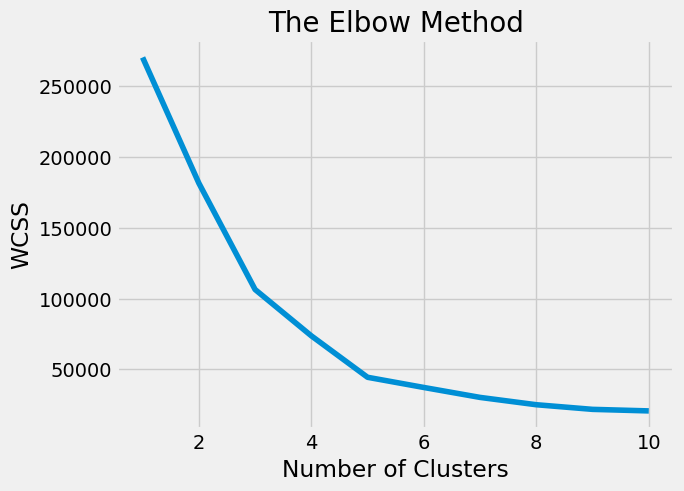

In [27]:

# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

# Visualizing Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

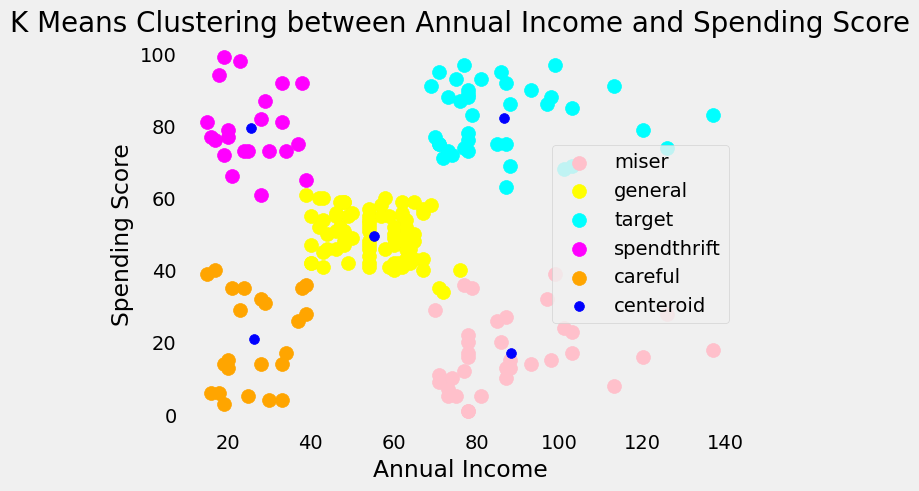

In [28]:
# Visualizing KMeans Clustering
km = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='pink', label='miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='yellow', label='general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c='cyan', label='target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s=100, c='magenta', label='spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s=100, c='orange', label='careful')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='blue', label='centeroid')

plt.title('K Means Clustering between Annual Income and Spending Score', fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()
